# Mobile Phone

## Intro



## Problem
- How to estimate price of mobile phone that company created


## Goal
- Predict optimum price ranges for a list of mobile phones in the market
- To seek relations between features of a mobile phone


## Dataset
- Kaggle : mobile price classification

### Data

- `battery_power` : Total energy a battery can store in one time measured in mAh. mAh means milliamp Hour and is a unit that measures (electric) power over time
- `blue` : Has bluetooth or not
- `clock_speed` : speed at which microprocessor executes instructions
- `dual_sim` : Has dual sim support or not
- `fc` : Front Camera mega pixels
- `four_g` : Has 4G or not
- `int_memory` : Internal Memory in Gigabytes
- `m_dep` : Mobile Depth in cm
- `mobile_wt` : Weight of mobile phone
- `n_cores` : Number of cores of processor
- `pc` : Primary Camera mega pixels
- `px_height` : Pixel Resolution Height
- `px_width` : Pixel Resolution Width
- `ram` : Random Access Memory in Megabytes
- `sc_h` : Screen Height of mobile in cm
- `sc_w` : Screen Width of mobile in cm
- `talk_time` : longest time that a single battery charge will last when you are
- `three_g` : Has 3G or not
- `touch_screen` : Has touch screen or not
- `wifi` : Has wifi or not
- `price_range` : This is the target variable with value of 
    - 0 (low cost), 
    - 1 (medium cost), 
    - 2 (high cost) and 
    - 3 (very high cost)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mobilephone.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
mobileDesc = []

for i in df.columns:
    mobileDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = mobileDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,battery_power,int64,0,0.0,1094,"[1531, 882]"
1,blue,int64,0,0.0,2,"[1, 0]"
2,clock_speed,float64,0,0.0,26,"[0.8, 1.5]"
3,dual_sim,int64,0,0.0,2,"[0, 1]"
4,fc,int64,0,0.0,20,"[16, 11]"
5,four_g,int64,0,0.0,2,"[0, 1]"
6,int_memory,int64,0,0.0,63,"[58, 27]"
7,m_dep,float64,0,0.0,10,"[0.4, 0.7]"
8,mobile_wt,int64,0,0.0,121,"[152, 192]"
9,n_cores,int64,0,0.0,8,"[5, 3]"


In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
# Method describe to obtain a statistical summary
df.describe().T

# The mobile has an average battery capacity of 1,238 mAh.
# 51% of mobiles support dual sim
# The highest megapixels for front camera we have on data is 17 MP.
# Half of mobile on dataset already supported with 4G
# Average internal memory is 32GB. with minimum 16GB and maximum 64GB.
# Most lightweight is around 80gr, which 60gr more compact than the average.
# We have 2 GB RAM in average.

# Most phones are :
#         - touch screen 
#         - with WIFI, 
#         - Bluetooth, 
#         - Dual SIM, 
#         - Camera 10 MP and 4 MP Front Camera, 
#         - Internal Memory 32GB, 
#         - RAM 2 GB
#         - Battery capacity 1,238 mAh
#         - 11 Hours talk time
#         - Weight 140 g

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


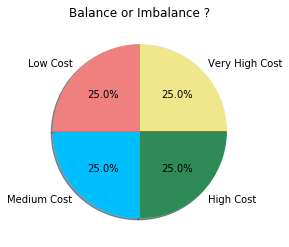

In [8]:
labels = ["Low Cost", "Medium Cost", "High Cost", "Very High Cost"]
values = df['price_range'].value_counts().values
colors = ['lightcoral','deepskyblue','seagreen', 'khaki']
fig1, ax = plt.subplots()
ax.pie(values, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.set_title('Balance or Imbalance ?')
plt.show()


# Our dataset is balance data

In [9]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

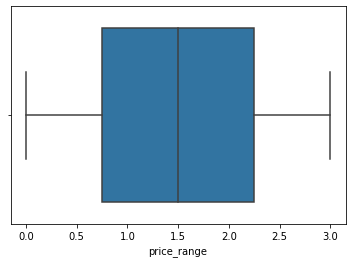

In [10]:
sns.boxplot(df['price_range'])

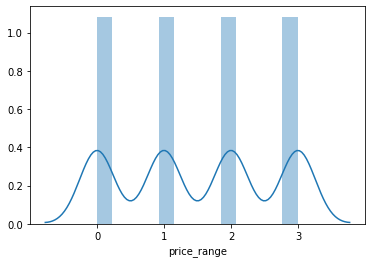

In [11]:
sns.distplot(df['price_range'])

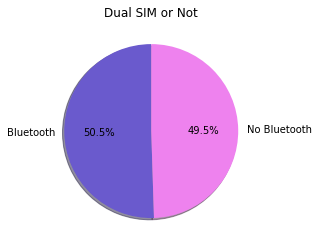

In [12]:
labels = ["Bluetooth",'No Bluetooth']
values = df['blue'].value_counts().values
colors = ['slateblue','violet']
fig1, ax = plt.subplots()
ax.pie(values, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.set_title('Dual SIM or Not')
plt.show()

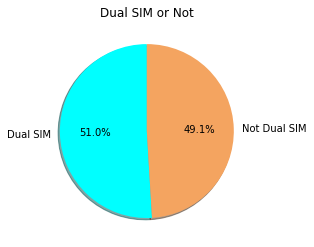

In [13]:
labels = ["Dual SIM", "Not Dual SIM"]
values = df['dual_sim'].value_counts().values
colors = ['cyan','sandybrown']
fig1, ax = plt.subplots()
ax.pie(values, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.set_title('Dual SIM or Not')
plt.show()

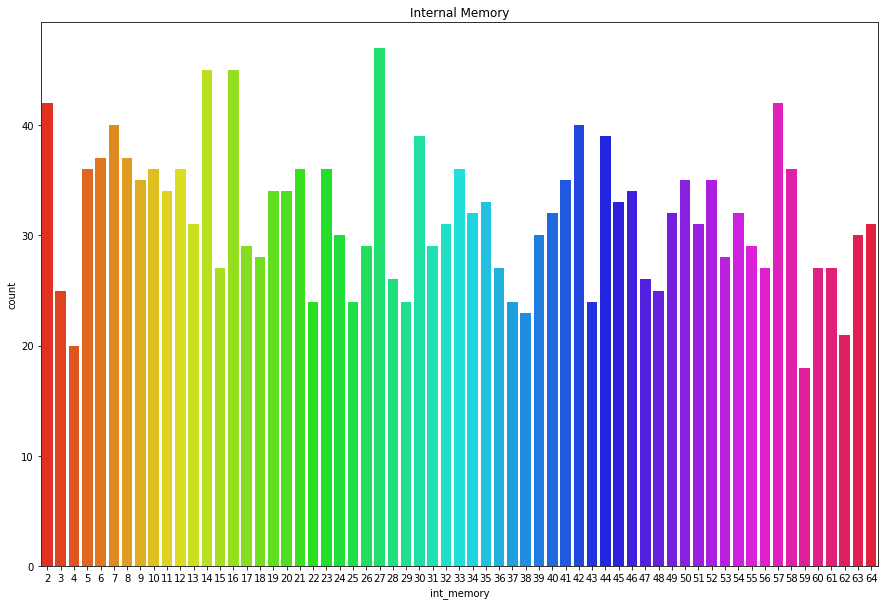

In [14]:
plt.figure(figsize = (15,10))
sns.countplot(df['int_memory'], palette = 'hsv')
plt.title('Internal Memory')
plt.show()

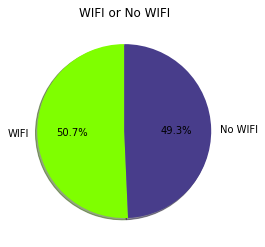

In [16]:
labels = ["WIFI", "No WIFI"]
values = df['wifi'].value_counts().values
colors = ['chartreuse','darkslateblue']
fig1, ax = plt.subplots()
ax.pie(values, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.set_title('WIFI or No WIFI')
plt.show()

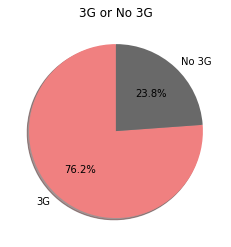

In [17]:
labels = ["3G", "No 3G"]
values = df['three_g'].value_counts().values
colors = ['lightcoral','dimgrey']
fig1, ax = plt.subplots()
ax.pie(values, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.set_title('3G or No 3G')
plt.show()

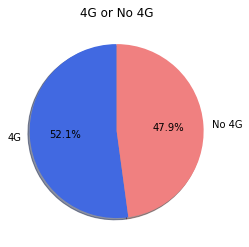

In [18]:
labels = ["4G", "No 4G"]
values = df['four_g'].value_counts().values
colors = ['royalblue','lightcoral']
fig1, ax = plt.subplots()
ax.pie(values, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.set_title('4G or No 4G')
plt.show()

# More than half of phone already have 4G


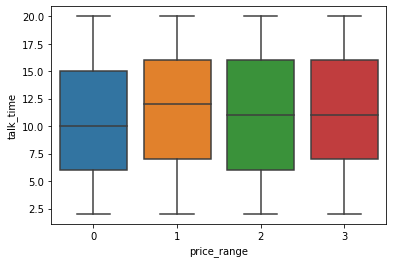

In [24]:
sns.boxplot(x='price_range', y='talk_time', data=df)

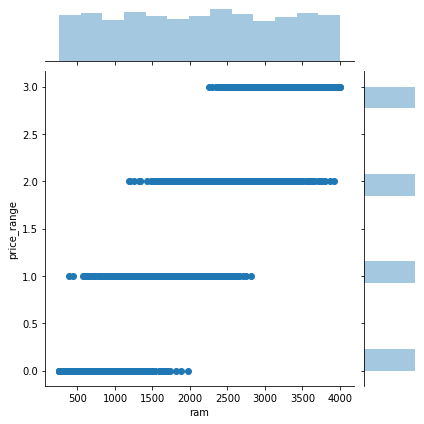

In [25]:
sns.jointplot(x='ram', y='price_range', data=df)

# Semakin tinggi price range, maka RAM yang gunakan smakin besar
# Misal : price range 3 (very high cost) mobile phone, akan memiliki RAM lebih dari 2GB/ 2000MB


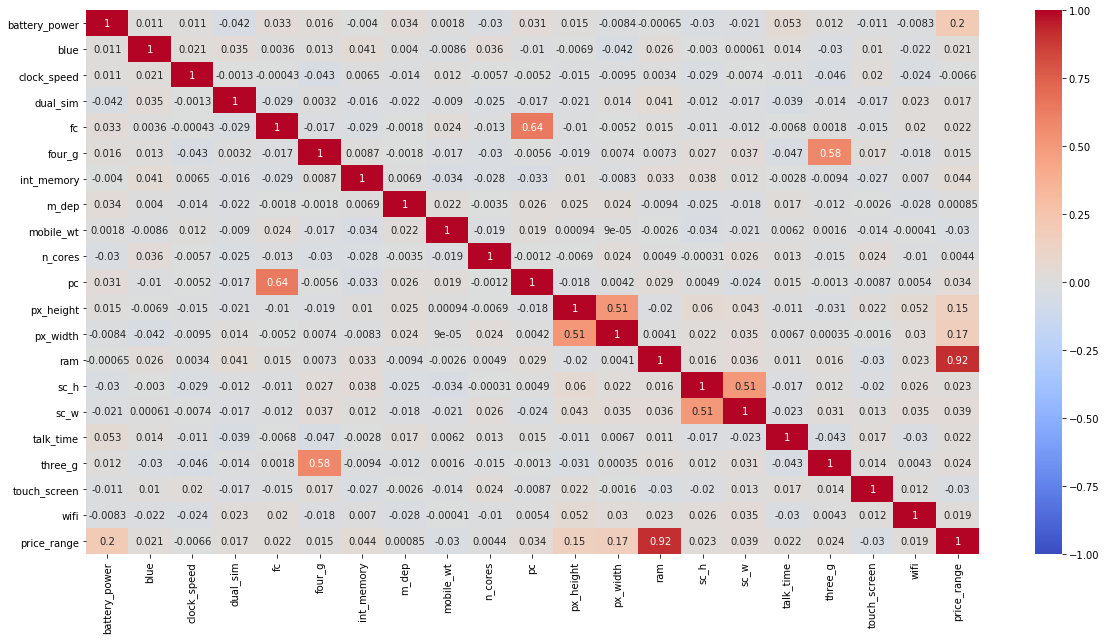

In [20]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

In [21]:
df.corr()['price_range'].sort_values(ascending = True)

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

Have correlation with Price Range :
- Negative correlation :
    - Touch screen
    - Mobile Weight
    
- Positive correlation :
    - RAM
    - Battery Power/ capacity
    - Pixel Resolution Width
    - Pixel Resolution Height
    - Internal Memory
    - Pixel
    - Primary Camera